In [1]:
import pandas as pd
df = pd.read_csv("D:/Tugas Akhir/Codingan/Notebook - Playground/preprocessed_data_train_3.csv")
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2023-06-22,Married,1,SLTA,9.0,...,Mid-term,2.800000,2,1,1418218.0,1,1.418218e+06,2.2,Medium,9.246870
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2023-04-04,Married,1,SLTA,0.0,...,Mid-term,13.000000,2,1,1060575.0,1,1.060575e+06,1.6,Medium,9.650000
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2023-03-25,Married,4,D2,4.0,...,Mid-term,5.400000,5,1,4885136.0,3,1.628379e+06,1.0,Medium,9.813826
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-03-23,Married,1,D3,2.0,...,Mid-term,5.333333,2,1,4602479.0,4,1.150620e+06,2.4,Medium,9.756440
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2023-07-21,Married,3,SLTA,0.0,...,Mid-term,25.000000,4,1,1066966.0,1,1.066966e+06,2.6,Medium,9.080000


In [23]:
len(df)

13770

In [2]:
churn = df['churn_status']
exploded_churn = churn.explode()

churn_count = exploded_churn.value_counts().reset_index()
churn_count.columns = ['churn_status', 'Count']
churn_count

,churn_status,Count
0,0,10696
1,1,3074


In [3]:
data = pd.DataFrame()
for index, row in churn_count.iterrows():
    churn = row['churn_status']  
    count = row['Count']
    if count > 3074:
        filtered_data = df[df['churn_status'] == churn].sample(3074)
        data = pd.concat([data, filtered_data])

for index, row in churn_count.iterrows():
    churn = row['churn_status']  
    count = row['Count']
    if count <= 3074:
        filtered_data = df[df['churn_status'] == churn]
        data = pd.concat([data, filtered_data])

data.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
12683,EM12967,Kota Jakarta Utara,Laki-laki,1998-03-13,2020-05-03,2024-07-04,Single,0,SLTA,7.0,...,Long-term,6.250000,1,1,1776619.0,1,1776619.0,1.6,Low,9.884603
11885,EM8515,Tangerang,Laki-laki,2000-03-31,2022-08-23,2024-10-31,Single,0,SLTA,0.0,...,Mid-term,26.000000,1,1,1104966.0,1,1104966.0,2.6,Medium,9.260000
13621,EM9679,Kota Bekasi,Perempuan,1975-07-01,2021-12-06,2024-10-31,Married,2,S1,5.0,...,Mid-term,5.833333,3,2,2519458.0,5,1007783.2,2.0,Medium,9.335163
8399,EM15269,Kabupaten Bekasi,Laki-laki,1988-01-19,2022-11-01,2024-10-31,Married,2,S1,2.0,...,Mid-term,8.000000,3,2,3015150.5,5,1206060.2,1.0,Medium,9.740976
5525,EM2598,Tangerang,Laki-laki,1996-03-11,2021-06-08,2024-10-31,Single,0,D3,4.0,...,Long-term,8.200000,1,1,4488998.0,4,1122249.5,1.0,Low,9.120106


In [4]:
from sklearn.model_selection import train_test_split

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

X = data.drop(columns=['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'])
y = data['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X.head()

,domisili,jenis_kelamin,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
12683,Kota Jakarta Utara,Laki-laki,Single,0,SLTA,7.0,9.90,Creative & Design,Staff,1776619,...,Long-term,6.250000,1,1,1776619.0,1,1776619.0,1.6,Low,9.884603
11885,Tangerang,Laki-laki,Single,0,SLTA,0.0,9.26,Operations,Staff,1104966,...,Mid-term,26.000000,1,1,1104966.0,1,1104966.0,2.6,Medium,9.260000
13621,Kota Bekasi,Perempuan,Married,2,S1,5.0,9.35,Engineering & IT,Junior,5038916,...,Mid-term,5.833333,3,2,2519458.0,5,1007783.2,2.0,Medium,9.335163
8399,Kabupaten Bekasi,Laki-laki,Married,2,S1,2.0,9.75,HR,Junior,6030301,...,Mid-term,8.000000,3,2,3015150.5,5,1206060.2,1.0,Medium,9.740976
5525,Tangerang,Laki-laki,Single,0,D3,4.0,9.13,Service & Support,Staff,4488998,...,Long-term,8.200000,1,1,4488998.0,4,1122249.5,1.0,Low,9.120106


In [25]:
X.to_csv(r"D:\Tugas Akhir\Codingan\Development\App\X_train.csv", index=False)

In [5]:
from catboost import CatBoostClassifier
import pandas as pd

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    cat_features= cat_feature,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    verbose=200
)

# Melatih model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.9491030	best: 0.9491030 (0)	total: 266ms	remaining: 4m 26s
200:	test: 0.9793245	best: 0.9793245 (200)	total: 14.5s	remaining: 57.8s
400:	test: 0.9820451	best: 0.9820530 (398)	total: 27s	remaining: 40.3s
600:	test: 0.9827616	best: 0.9827616 (597)	total: 40.5s	remaining: 26.9s
800:	test: 0.9831529	best: 0.9831820 (788)	total: 54.9s	remaining: 13.6s
999:	test: 0.9837425	best: 0.9837425 (999)	total: 1m 9s	remaining: 0us

bestTest = 0.9837424813
bestIteration = 999



In [6]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Fungsi objective untuk Optuna
def objective(trial):
    # Definisikan parameter yang akan dioptimasi
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5, 20),
        'random_strength': trial.suggest_float('random_strength', 5, 10),
        'cat_features': cat_feature,
        'loss_function': 'Logloss',
        'random_state': 42,
        'verbose': 0
    }

    # Inisialisasi model dengan parameter yang dioptimasi
    model = CatBoostClassifier(**params)

    # Melatih model dengan validasi
    model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

    # Prediksi probabilitas untuk menghitung AUC
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    return auc  # Mengembalikan AUC sebagai skor yang ingin dimaksimalkan

d:\Tugas Akhir\Codingan\Notebook - Playground\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Buat studi Optuna untuk memaksimalkan AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Lakukan 20 percobaan

# Tampilkan hasil terbaik
print("Best Trial:")
print(f"AUC: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-01-31 18:51:48,706] A new study created in memory with name: no-name-64301d1e-ebb0-4383-9c80-96d0c991cd74
[I 2025-01-31 18:52:32,766] Trial 0 finished with value: 0.9773838323749091 and parameters: {'iterations': 898, 'learning_rate': 0.011053171335873363, 'depth': 5, 'subsample': 0.6792060501802821, 'colsample_bylevel': 0.677770309507521, 'l2_leaf_reg': 6.799321957299509, 'random_strength': 9.022785536036583}. Best is trial 0 with value: 0.9773838323749091.
[I 2025-01-31 18:53:04,401] Trial 1 finished with value: 0.9764399497653513 and parameters: {'iterations': 751, 'learning_rate': 0.010856162412518163, 'depth': 4, 'subsample': 0.7382693336863855, 'colsample_bylevel': 0.7186692583510685, 'l2_leaf_reg': 8.362893889778585, 'random_strength': 8.702993428810624}. Best is trial 0 with value: 0.9773838323749091.
[I 2025-01-31 18:54:04,581] Trial 2 finished with value: 0.9846493489325138 and parameters: {'iterations': 923, 'learning_rate': 0.04798765627548158, 'depth': 6, 'subsampl

Best Trial:
AUC: 0.9852865357921872
Params:
  iterations: 769
  learning_rate: 0.06982641965149956
  depth: 6
  subsample: 0.6814518799518184
  colsample_bylevel: 0.7775983370027374
  l2_leaf_reg: 8.960252840750547
  random_strength: 9.846274339599894


In [8]:
# Ambil parameter terbaik dari Optuna
best_params = study.best_trial.params

# Tambahkan parameter tetap (yang tidak dioptimasi)
best_params.update({
    'loss_function': 'Logloss',  # Gunakan Logloss sebagai loss function
    'cat_features': cat_feature,
    'random_state': 42,
    'verbose': 200,  # Aktifkan output verbose
    'od_type': 'Iter',
    'od_wait': 50
})

# Latih model dengan parameter terbaik
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Evaluasi model final
y_pred = final_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred)
print(f"Final AUC: {final_auc}")

0:	learn: 0.5922554	test: 0.5897562	best: 0.5897562 (0)	total: 108ms	remaining: 1m 22s
200:	learn: 0.1113078	test: 0.1422183	best: 0.1422137 (199)	total: 13.2s	remaining: 37.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1357173793
bestIteration = 347

Shrink model to first 348 iterations.
Final AUC: 0.9844008196179522


In [22]:
import pickle

with open('clasification_model.sav', 'wb') as f:
    pickle.dump(final_model, f)
print("CatBoost Classification model saved to 'clasification_model.sav'")

CatBoost Classification model saved to 'clasification_model.sav'


In [9]:
evals_result = final_model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

Final Training Logloss: 0.07900948412964129
Final Validation Logloss: 0.1360854668410178


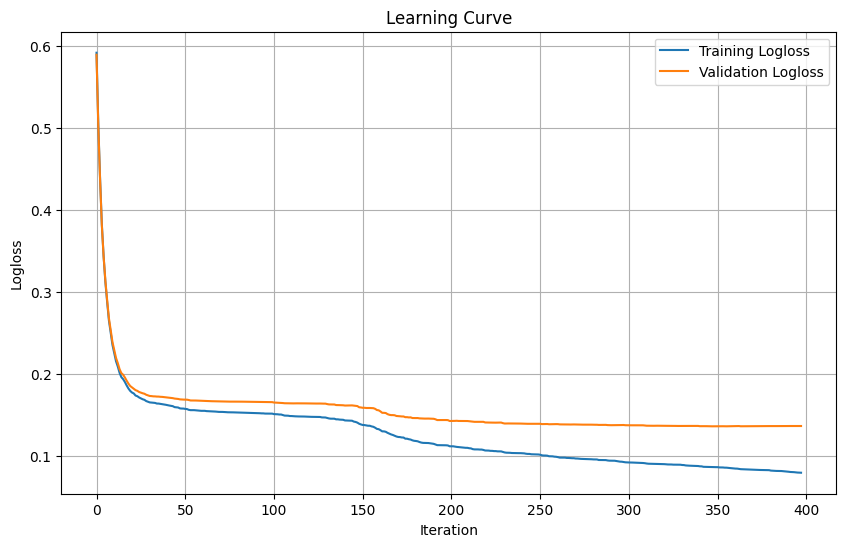

In [10]:
import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

0:	total: 53.9ms	remaining: 53.8s
200:	total: 15.8s	remaining: 1m 2s
400:	total: 32.7s	remaining: 48.9s
600:	total: 48.3s	remaining: 32.1s
800:	total: 1m 3s	remaining: 15.8s
999:	total: 1m 18s	remaining: 0us
0:	total: 67.1ms	remaining: 1m 7s
200:	total: 16.2s	remaining: 1m 4s
400:	total: 30.7s	remaining: 45.8s
600:	total: 42.6s	remaining: 28.2s
800:	total: 56.8s	remaining: 14.1s
999:	total: 1m 10s	remaining: 0us
0:	total: 115ms	remaining: 1m 54s
200:	total: 13.6s	remaining: 54.1s
400:	total: 26.6s	remaining: 39.7s
600:	total: 39.4s	remaining: 26.1s
800:	total: 52.8s	remaining: 13.1s
999:	total: 1m 6s	remaining: 0us
0:	total: 55.5ms	remaining: 55.4s
200:	total: 13.7s	remaining: 54.6s
400:	total: 26.3s	remaining: 39.3s
600:	total: 38.2s	remaining: 25.4s
800:	total: 50.6s	remaining: 12.6s
999:	total: 1m 3s	remaining: 0us
0:	total: 58.5ms	remaining: 58.4s
200:	total: 12.5s	remaining: 49.6s
400:	total: 25.3s	remaining: 37.8s
600:	total: 37.7s	remaining: 25.1s
800:	total: 51.5s	remaining: 12

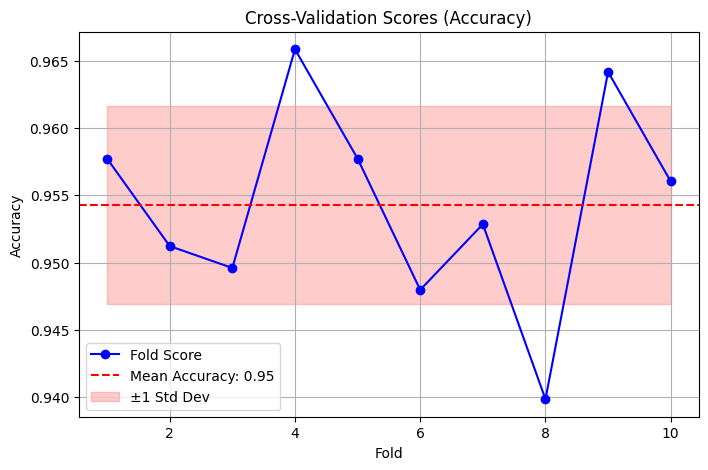

Accuracy Scores for each fold: [0.95772358 0.95121951 0.9495935  0.96585366 0.95772358 0.94796748
 0.95284553 0.9398374  0.96416938 0.95602606]
Mean Accuracy: 0.95
Standard Deviation: 0.01


In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung skor cross-validation dan visualisasi
def cross_validate_and_visualize_accuracy(model, X, y, cv=10):
    # Stratified K-Fold untuk mempertahankan distribusi label
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Hitung skor cross-validation dengan metrik akurasi
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf)

    # Rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Visualisasi hasil cross-validation
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, cv + 1), scores, marker='o', linestyle='-', color='b', label='Fold Score')
    plt.axhline(y=mean_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_score:.2f}')
    plt.fill_between(range(1, cv + 1), mean_score - std_score, mean_score + std_score, color='r', alpha=0.2, label='±1 Std Dev')
    plt.title('Cross-Validation Scores (Accuracy)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Cetak hasil skor
    print(f'Accuracy Scores for each fold: {scores}')
    print(f'Mean Accuracy: {mean_score:.2f}')
    print(f'Standard Deviation: {std_score:.2f}')

# Contoh penggunaan
# Ganti model dengan model Anda, misalnya `model`
cross_validate_and_visualize_accuracy(model, X, y, cv=10)

0:	learn: 0.5888696	total: 136ms	remaining: 1m 44s
200:	learn: 0.1175942	total: 12s	remaining: 34s
400:	learn: 0.0930919	total: 25.9s	remaining: 23.8s
600:	learn: 0.0725604	total: 40.8s	remaining: 11.4s
768:	learn: 0.0585621	total: 52.3s	remaining: 0us
0:	learn: 0.5886265	total: 73.6ms	remaining: 56.5s
200:	learn: 0.1198413	total: 13.5s	remaining: 38.1s
400:	learn: 0.0881541	total: 27.7s	remaining: 25.5s
600:	learn: 0.0662039	total: 41.6s	remaining: 11.6s
768:	learn: 0.0527943	total: 53.4s	remaining: 0us
0:	learn: 0.5897432	total: 60.9ms	remaining: 46.7s
200:	learn: 0.1123212	total: 12.1s	remaining: 34.3s
400:	learn: 0.0833892	total: 25.9s	remaining: 23.8s
600:	learn: 0.0613133	total: 40.7s	remaining: 11.4s
768:	learn: 0.0478552	total: 52.5s	remaining: 0us
0:	learn: 0.5899386	total: 56.5ms	remaining: 43.4s
200:	learn: 0.1199977	total: 12.3s	remaining: 34.7s
400:	learn: 0.0868800	total: 26.2s	remaining: 24.1s
600:	learn: 0.0666446	total: 40.4s	remaining: 11.3s
768:	learn: 0.0538801	tota

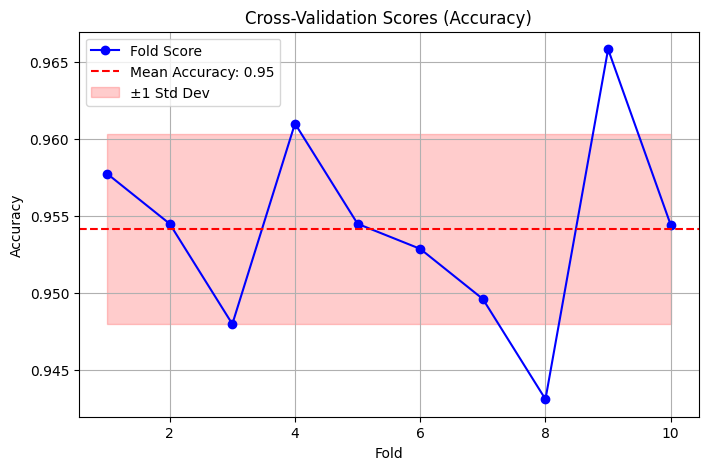

Accuracy Scores for each fold: [0.95772358 0.95447154 0.94796748 0.96097561 0.95447154 0.95284553
 0.9495935  0.94308943 0.96579805 0.95439739]
Mean Accuracy: 0.95
Standard Deviation: 0.01


In [21]:
cross_validate_and_visualize_accuracy(final_model, X, y, cv=10)

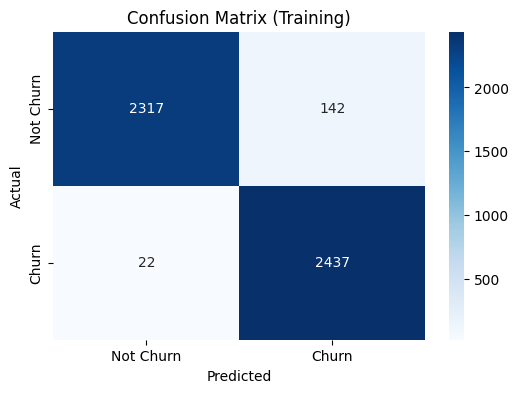

Training Metrics:
Accuracy: 0.97
Precision: 0.94
Recall: 0.99
F1 Score: 0.97
------------------------------


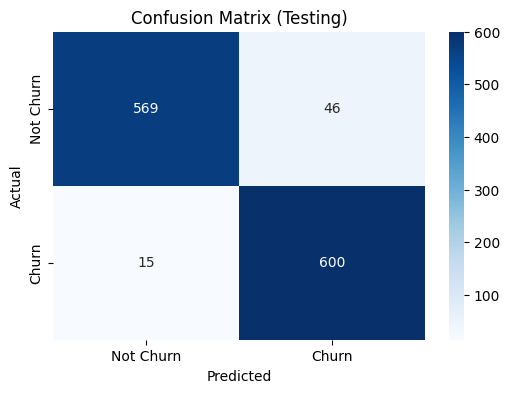

Testing Metrics:
Accuracy: 0.95
Precision: 0.93
Recall: 0.98
F1 Score: 0.95
------------------------------


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan confusion matrix dan metrik evaluasi
def evaluate_model(y_true, y_pred, dataset_name):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f'{dataset_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('-' * 30)

# Prediksi untuk data training dan testing
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

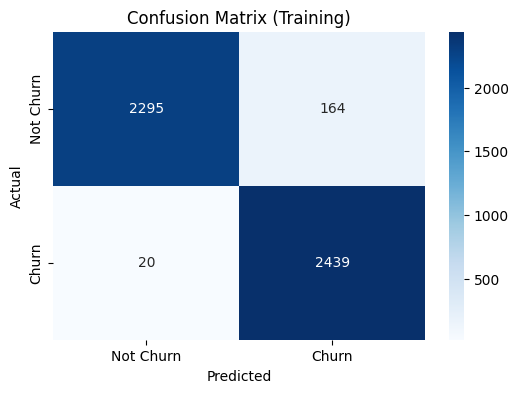

Training Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.99
F1 Score: 0.96
------------------------------


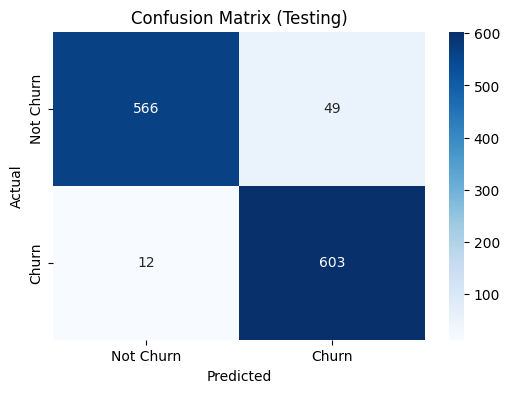

Testing Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 0.98
F1 Score: 0.95
------------------------------


In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

Final Training Logloss: 0.10264213391001191
Final Validation Logloss: 0.14014741622356627


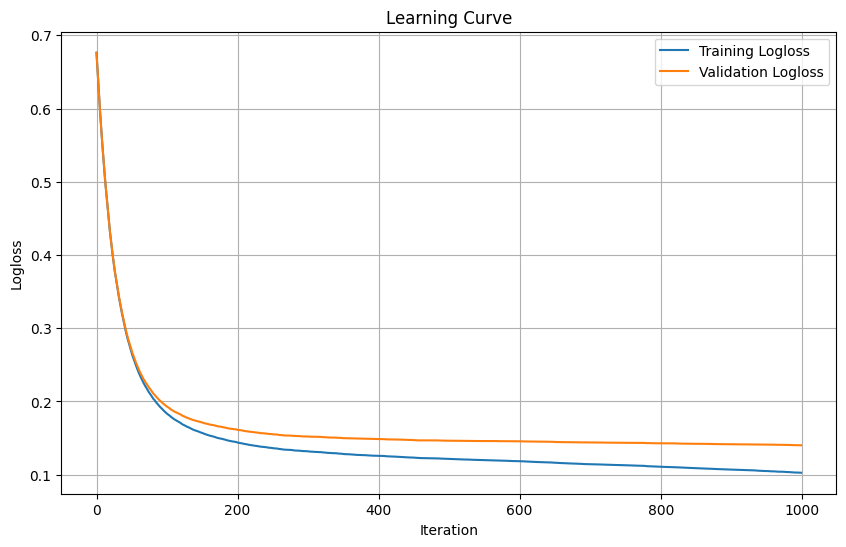

In [13]:
evals_result = model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [26]:
df_test = pd.read_csv('D:/Tugas Akhir/Codingan/Notebook - Playground/preprocessed_data_test_5.csv')
df_test.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM0120,Tangerang,Laki-laki,1990-02-18,2023-01-11,2024-01-30,Married,1,SLTA,11.0,...,Mid-term,1.000000,2,1,1140915.0,1,1140915.0,1.4,Medium,9.393432
1,EM13985,Kepulauan Seribu,Perempuan,1987-02-01,2022-09-26,2023-11-08,Married,1,SLTA,0.0,...,Mid-term,13.000000,2,1,2103348.0,1,2103348.0,1.8,Medium,9.300000
2,EM2560,Tangerang,Perempuan,1999-11-01,2023-01-05,2024-05-04,Single,0,SLTA,10.0,...,Mid-term,1.454545,1,1,2145814.0,1,2145814.0,1.6,Medium,9.205670
3,EM0343,Kabupaten Bekasi,Laki-laki,1990-10-12,2022-02-01,2023-07-17,Single,0,SLTA,1.0,...,Mid-term,8.500000,1,1,2331081.0,1,2331081.0,2.6,Medium,9.154017
4,EM14458,Kabupaten Bogor,Perempuan,1996-04-24,2022-10-23,2023-12-30,Married,1,SLTA,12.0,...,Mid-term,1.076923,2,1,1798725.0,1,1798725.0,2.6,Medium,9.706741


In [30]:
df_test['churn_status'].value_counts()

churn_status
1    809
0    798
Name: count, dtype: int64

In [27]:
len(df_test)

1607

In [15]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9477286869943995
Precision: 0.9142857142857143
Recall: 0.9888751545117429
F1 Score: 0.9501187648456056


In [33]:
df_test = pd.read_csv('D:/Tugas Akhir/Codingan/Notebook - Playground/preprocessed_data_test_7.csv')
df_test.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM0406,Kota Jakarta Utara,Laki-laki,1975-01-07,2021-09-25,2023-12-07,Married,3,SLTA,3.0,...,Mid-term,6.500000,4,1,1578410.0,1,1578410.00,1.0,Medium,9.797428
1,EM1772,Kabupaten Bogor,Perempuan,1993-04-18,2021-02-23,2023-06-24,Married,1,SLTA,2.0,...,Mid-term,9.333333,2,1,2003154.0,1,2003154.00,2.2,Medium,9.342582
2,EM7996,Tangerang,Laki-laki,1998-02-12,2023-05-04,2024-06-29,Single,0,SLTA,5.0,...,Mid-term,2.333333,1,1,1394384.0,1,1394384.00,3.0,Medium,9.551975
3,EM13978,Kota Jakarta Barat,Perempuan,1982-12-26,2021-09-11,2023-04-03,Married,0,D3,0.0,...,Mid-term,18.000000,1,1,4151999.0,4,1037999.75,2.6,Medium,9.180000
4,EM9860,Tangerang,Perempuan,1997-03-26,2023-06-20,2024-10-02,Single,0,SLTA,15.0,...,Mid-term,0.937500,1,1,1560817.0,1,1560817.00,2.6,Medium,9.414301


In [34]:
df_test['churn_status'].value_counts()

churn_status
1    161
Name: count, dtype: int64

In [35]:
len(df_test)

161

In [36]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [5]:
import pandas as pd

df_test = pd.read_csv('D:\Tugas Akhir\Codingan\Development\Data\data_testing_resign_6.csv')
df_test

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM0012,Tangerang,Laki-laki,1970-12-21,2023-02-23,2024-08-07,Married,3,D3,2.0,...,Mid-term,5.666667,4,1,4708861.0,4,1.177215e+06,1.4,Medium,9.857106
1,EM0026,Kota Depok,Laki-laki,1986-11-14,2022-04-17,2024-08-04,Married,2,SLTA,4.0,...,Mid-term,5.600000,3,1,1430853.0,1,1.430853e+06,1.0,Medium,9.694593
2,EM0041,Kota Jakarta Barat,Laki-laki,1983-03-16,2023-06-15,2024-09-06,Divorce,3,SLTA,7.0,...,Mid-term,1.750000,1,1,1379381.0,1,1.379381e+06,2.4,Medium,9.059429
3,EM0053,Kota Jakarta Timur,Laki-laki,1979-07-13,2023-07-11,2024-09-21,Single,0,SLTA,1.0,...,Mid-term,7.000000,1,1,1911583.0,1,1.911583e+06,1.0,Medium,9.842189
4,EM0057,Kota Jakarta Barat,Perempuan,2000-03-13,2022-07-14,2024-08-29,Single,0,D2,8.0,...,Mid-term,2.777778,1,1,3724157.0,3,1.241386e+06,2.0,Medium,9.047730
5,EM0058,Tangerang,Perempuan,1996-04-23,2023-07-18,2024-09-26,Single,0,SLTA,9.0,...,Mid-term,1.400000,1,1,2229928.0,1,2.229928e+06,1.4,Medium,9.114481
6,EM0064,Kota Jakarta Utara,Perempuan,1987-04-20,2022-07-25,2024-08-23,Married,3,SLTA,0.0,...,Mid-term,25.000000,4,1,1257855.0,1,1.257855e+06,2.2,Medium,9.320000
7,EM0180,Kota Jakarta Utara,Perempuan,2000-06-25,2022-09-04,2024-10-07,Single,0,D2,7.0,...,Mid-term,3.125000,1,1,3034058.0,3,1.011353e+06,2.2,Medium,9.091639
8,EM0259,Kepulauan Seribu,Laki-laki,1993-10-04,2023-06-08,2024-08-29,Single,0,D1,4.0,...,Mid-term,2.800000,1,1,4513378.0,2,2.256689e+06,2.6,Medium,9.479833
9,EM0263,Kabupaten Bogor,Laki-laki,1995-02-15,2022-06-15,2024-07-27,Married,1,SLTA,13.0,...,Mid-term,1.785714,2,1,1599099.0,1,1.599099e+06,1.6,Medium,9.077272


In [31]:
df_test.isna().sum()

employee_id                          0
domisili                             0
jenis_kelamin                        0
date_of_birth                        0
join_date                            0
resign_date                          0
marriage_stat                        0
dependant                            0
education                            0
absent_90D                           0
avg_time_work                        0
departemen                           0
position                             0
income                               0
total_komp                           0
job_satisfaction                     0
performance_rating                   0
churn_status                         0
age_years                            0
active_work                          0
active_work_months                   0
income_3_months                      0
income_6_months                      0
total_income_work                    0
absence_ratio                        0
income_dependant_ratio   

In [5]:
import pickle

final_model = pickle.load(open('clasification_model.sav', 'rb'))

In [12]:
expected_columns = final_model.feature_names_
print(expected_columns)

['departemen', 'position', 'income', 'domisili', 'marriage_stat', 'dependant', 'education', 'absent_90D', 'avg_time_work', 'total_komp', 'job_satisfaction', 'performance_rating', 'age_years', 'active_work', 'active_work_months', 'income_3_months', 'income_6_months', 'total_income_work', 'absence_ratio', 'income_dependant_ratio', 'work_efficiency', 'active_work_category', 'work_stability_score', 'married_dependent_ratio', 'position_score', 'job_income_position_score', 'education_score', 'education_income_ratio', 'weighted_satisfaction_performance', 'resign_risk_indicator', 'adjusted_work_time']


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import Pool

# Drop kolom yang tidak relevan
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

# Konversi semua kolom kategori ke string
cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 
               'performance_rating', 'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

# Pastikan semua fitur kategori adalah string
for col in cat_feature:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(str)

# Buat Pool untuk data uji
test_pool = Pool(data=X_test, cat_features=cat_feature)

# Prediksi dengan model menggunakan Pool
y_pred = final_model.predict(test_pool)

# Evaluasi
accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
df_test.describe()

,income,dependant,absent_90D,avg_time_work,total_komp,churn_status,age_years,active_work,active_work_months,income_3_months,...,income_dependant_ratio,work_efficiency,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,adjusted_work_time
count,8.120000e+02,812.000000,812.000000,812.0,812.000000,812.0,812.000000,812.000000,812.000000,8.120000e+02,...,8.120000e+02,812.000,812.000000,812.000000,812.000000,8.120000e+02,812.000000,8.120000e+02,812.000000,812.000000
mean,2.704077e+06,1.443350,5.703202,9.0,0.116995,1.0,37.488916,601.076355,19.556650,8.112230e+06,...,1.494665e+06,1.125,5.940580,2.387931,1.008621,2.676485e+06,1.838670,1.650454e+06,2.018966,8.967059
std,1.217016e+06,1.272101,4.420202,0.0,0.543866,0.0,8.914092,195.811635,6.545148,3.651049e+06,...,1.103701e+06,0.000,6.556615,1.283876,0.092504,1.165877e+06,1.136691,5.549310e+05,0.580476,0.029627
min,1.015570e+06,0.000000,0.000000,9.0,0.000000,1.0,1.000000,365.000000,12.000000,3.046710e+06,...,1.907077e+05,1.125,0.705882,1.000000,1.000000,1.015570e+06,1.000000,7.524518e+05,1.000000,8.866790
25%,1.570747e+06,0.000000,2.000000,9.0,0.000000,1.0,30.000000,428.000000,14.000000,4.712242e+06,...,6.466449e+05,1.125,1.854396,1.000000,1.000000,1.570747e+06,1.000000,1.200502e+06,1.600000,8.950040
50%,2.561418e+06,1.000000,5.000000,9.0,0.000000,1.0,37.000000,496.500000,16.000000,7.684256e+06,...,1.168337e+06,1.125,3.200000,2.000000,1.000000,2.561418e+06,1.000000,1.548386e+06,2.000000,8.973353
75%,3.692924e+06,2.000000,9.000000,9.0,0.000000,1.0,44.000000,798.000000,26.000000,1.107877e+07,...,1.879129e+06,1.125,7.000000,3.000000,1.000000,3.679853e+06,3.000000,2.048790e+06,2.400000,8.991674
max,7.855813e+06,6.000000,16.000000,9.0,12.000000,1.0,57.000000,1095.000000,36.000000,2.356744e+07,...,7.855813e+06,1.125,33.000000,7.000000,2.000000,4.982560e+06,5.000000,2.996378e+06,3.000000,9.000000


In [ ]:
feature_names = X_train.columns.tolist()
feature_importance = model.get_feature_importance()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
21,active_work_category,54.255294
13,active_work,7.777737
1,position,7.155448
14,active_work_months,4.230350
24,position_score,3.667581
26,education_score,3.106486
16,income_6_months,3.089712
6,education,2.826131
2,income,2.385703
17,total_income_work,2.048091


In [28]:
import pickle

with open('clasification_model.sav', 'wb') as f:
    pickle.dump(final_model, f)
print("CatBoost Classification model saved to 'clasification_model.sav'")

CatBoost Classification model saved to 'clasification_model.sav'


In [2]:
%pip install streamlit-option-menu

  Using cached streamlit_option_menu-0.4.0-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
   ------------------------- -------------- 524.3/829.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 829.3/829.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.1 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.1 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/9.1 MB 4.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.1 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/9.1 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.1 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/9.1 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.1 MB 3.7 MB/s eta 0:00:01
   -----------

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\jesselyn mu\\anaconda3\\scripts\\streamlit.exe'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
